## Librerias

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

from prophet import Prophet

## Importar dataset

In [19]:
df = pd.read_csv('data/Month_Value_1.csv')

In [20]:
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [26]:
df.tail()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN
95,01.12.2022,NaN,NaN,NaN,NaN


In [21]:
df.shape

(96, 5)

In [22]:
df.columns.to_list()

['Period',
 'Revenue',
 'Sales_quantity',
 'Average_cost',
 'The_average_annual_payroll_of_the_region']

In [23]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,64.0,3.236045e+07,1.164150e+07,1.402148e+07,2.242655e+07,3.209088e+07,3.992999e+07,5.875647e+07
Sales_quantity,64.0,1.919738e+04,6.591287e+03,8.314000e+03,1.506550e+04,1.836800e+04,2.285625e+04,3.806900e+04
Average_cost,64.0,1.695061e+03,2.968448e+02,1.110577e+03,1.499143e+03,1.654400e+03,1.916401e+03,2.559328e+03
The_average_annual_payroll_of_the_region,64.0,2.869083e+07,1.057191e+06,2.740647e+07,2.782857e+07,2.819785e+07,2.987852e+07,3.002468e+07


In [27]:
df.dropna(axis=0, inplace=True)

In [28]:
df['Period'] = pd.to_datetime(df['Period'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Period                                    64 non-null     datetime64[ns]
 1   Revenue                                   64 non-null     float64       
 2   Sales_quantity                            64 non-null     float64       
 3   Average_cost                              64 non-null     float64       
 4   The_average_annual_payroll_of_the_region  64 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.0 KB


In [37]:
df_revenue = df[['Period', 'Average_cost']]

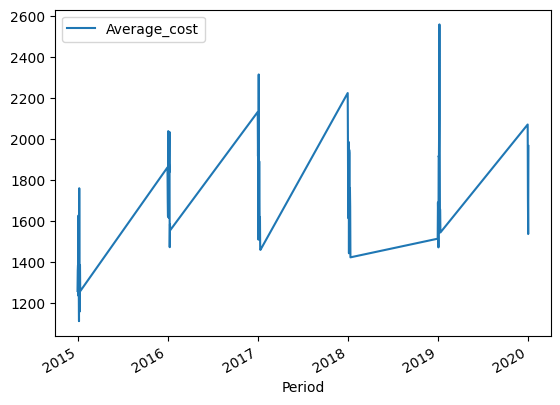

In [38]:
df_revenue.set_index('Period').plot();